In [1]:
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar

In [2]:
base = pd.read_csv('../datasets/wines.csv')

In [3]:
X = base.iloc[:, 1:14].values
y = base.iloc[:,0].values

In [4]:
# normalizando os valores entre 0 e 1
normalizador = MinMaxScaler(feature_range = (0,1))
X = normalizador.fit_transform(X)

In [5]:
# construção do mapa auto-organizavel 
# os valores de x e y foram alcançados pelo cálculo
# 5 raiz de N ou seja 5 raiz de 178, o resultado deve ser colocado em uma raiz quadrada
# por que queremos transformar em uma matriz, ou seja o resultado aqui é 65,65
# raiz de 65 é aproximada de 8 

# x = linhas e y = colunas, input_len = numero de entradas, sigma = ao raio
# partindo do centroide, learning_rate taxa de atualização dos pesos
# random_seed é a semente para a geração dos primeiros valores dos pesos
som = MiniSom(x = 8, y = 8, input_len=13, sigma= 1.0, learning_rate=0.5, random_seed=2) 
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [6]:
# analisando o mapa
# visualizando os pesos criados
som._weights

array([[[0.13277201, 0.10805625, 0.37081143, 0.3230228 , 0.19681718,
         0.2413142 , 0.21407854, 0.41505709, 0.20244899, 0.09606282,
         0.52550859, 0.28911837, 0.06177925],
        [0.17412499, 0.14090767, 0.4015812 , 0.35601993, 0.20743104,
         0.22402004, 0.21078345, 0.40190001, 0.20193816, 0.13255045,
         0.45085717, 0.301142  , 0.10165946],
        [0.25930829, 0.1424701 , 0.429785  , 0.40910913, 0.23567149,
         0.24054148, 0.16571882, 0.40376157, 0.2338656 , 0.22577168,
         0.30516301, 0.20330164, 0.12793232],
        [0.3158775 , 0.19719746, 0.46032212, 0.45154517, 0.2732842 ,
         0.25534902, 0.18841622, 0.28548683, 0.20800755, 0.27502893,
         0.16387967, 0.17415195, 0.11207492],
        [0.43722136, 0.28346054, 0.40590725, 0.35840092, 0.22386379,
         0.19985721, 0.09657207, 0.3615746 , 0.16098354, 0.28208232,
         0.18113213, 0.17585421, 0.18956725],
        [0.42043553, 0.31253179, 0.37858254, 0.35896595, 0.17499932,
         0.

In [7]:
# valores do mapa auto-organizavél
som._activation_map

array([[0.88504045, 0.90066872, 1.03088724, 1.19989235, 1.26281294,
        1.32814331, 1.40567305, 1.45320308],
       [0.89693912, 0.91117455, 1.01994921, 1.19549135, 1.24656052,
        1.33464876, 1.39441487, 1.41378084],
       [0.98775947, 0.97585449, 1.04213431, 1.11078575, 1.14026212,
        1.26438054, 1.34246807, 1.35172681],
       [1.07492946, 1.06922472, 1.06720021, 1.08668165, 1.11118279,
        1.15575803, 1.17542014, 1.15398716],
       [1.10396593, 1.10960979, 1.12647925, 1.10189812, 1.03984353,
        1.04036863, 1.02864838, 1.02416737],
       [1.08985597, 1.15426225, 1.17684951, 1.1712796 , 1.13324725,
        1.04889453, 1.00814402, 1.00576874],
       [1.02900167, 1.16440364, 1.21800124, 1.21056939, 1.19416898,
        1.13565449, 1.04418335, 1.02566488],
       [0.95020833, 1.09093132, 1.23041019, 1.24139534, 1.22573652,
        1.20932055, 1.09044588, 1.04540587]])

In [8]:
# visualizando quantas vezes cada neurônio foi selecionado como o BMU (o melhor centroide)
q = som.activation_response(X)

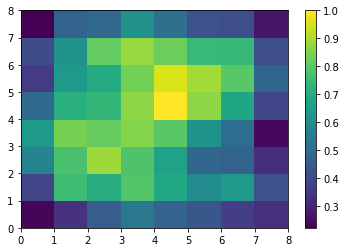

In [9]:
# Visualizando o quanto um neurônio é parecido com seus vizinhos
# quanto mais escuro o neurônio for significa que mais parecido ele é dos seus 
# vizinhos já o oposto acontece quando por ser mais claro e esses diferentes podem 
# não ser muito confiavéis por serem muito diferentes dos seus vizinhos
pcolor(som.distance_map().T)
colorbar()